In [1]:
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nasdaq technocolabs/Untitled Folder/Predicting-Stock-Price-Changes-Using-Past-Prices-and-News-Articles-ML1-main/Datasets/Market Headlines/News_articles_dataset.csv",parse_dates=['Date'])

In [4]:
df1.head()

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-02-01,What to expect from Apple in 2015 beyond its s...
2,2015-03-01,Mountie: An inexpensive and innovative way to ...
3,2015-04-01,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."


In [5]:
df1.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [6]:
df1.sort_index(inplace=True)

In [7]:
df1.head(10)

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-02-01,What to expect from Apple in 2015 beyond its s...
2,2015-03-01,Mountie: An inexpensive and innovative way to ...
3,2015-04-01,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
5,2015-06-01,"Technology Transforming Cars Into ""Phones On W..."
6,2015-07-01,Apple issues fourth developer beta of OS X 10....
7,2015-08-01,Apple company recalls 2014 shipments after lin...
8,2015-09-01,Samsung is reportedly making a secret new chip...
9,2015-10-01,"Eight years ago, Steve Jobs unveiled iPhone an..."


In [8]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nasdaq technocolabs/Untitled Folder/Predicting-Stock-Price-Changes-Using-Past-Prices-and-News-Articles-ML1-main/Datasets/Nasdaq Stocks/HistoricalData_APPLE.csv",parse_dates=['Date'])

In [9]:
df.head(10)

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
1,2021-06-08,$126.74,74403770,$126.6,$128.46,$126.2101
2,2021-06-07,$125.9,71057550,$126.17,$126.32,$124.8321
3,2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
4,2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13
5,2021-06-02,$125.06,59278860,$124.28,$125.24,$124.05
6,2021-06-01,$124.28,67637120,$125.08,$125.35,$123.94
7,2021-05-28,$124.61,71311110,$125.57,$125.8,$124.55
8,2021-05-27,$125.28,94625600,$126.44,$127.64,$125.08
9,2021-05-26,$126.85,56575920,$126.955,$127.39,$126.42


In [10]:
df.sort_values('Date',inplace=True)

In [11]:
df.reset_index()

,index,Date,Close/Last,Volume,Open,High,Low
0,2515,2011-06-10,$11.6393,433801306,$11.8054,$11.845,$11.6254
1,2514,2011-06-13,$11.6643,329376468,$11.6857,$11.7254,$11.6096
2,2513,2011-06-14,$11.8729,333995906,$11.7857,$11.9018,$11.7611
3,2512,2011-06-15,$11.6696,395841722,$11.7768,$11.7964,$11.6029
4,2511,2011-06-16,$11.6129,507299317,$11.675,$11.7386,$11.3689
...,...,...,...,...,...,...,...
2511,4,2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13
2512,3,2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
2513,2,2021-06-07,$125.9,71057550,$126.17,$126.32,$124.8321
2514,1,2021-06-08,$126.74,74403770,$126.6,$128.46,$126.2101


In [12]:
df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [13]:
a=pd.merge(df1,df,how='inner',on=['Date'])

In [14]:
a.head()

,Date,Headlines,Close/Last,Volume,Open,High,Low
0,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",$31.0625,161852560,$31.205,$31.28,$30.775
1,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",$32.2375,229396000,$31.525,$32.5325,$31.325
2,2015-06-01,"Technology Transforming Cars Into ""Phones On W...",$32.6337,128064080,$32.8,$32.8475,$32.5125
3,2015-07-01,Apple issues fourth developer beta of OS X 10....,$31.65,120827560,$31.725,$31.735,$31.4975
4,2015-09-01,Samsung is reportedly making a secret new chip...,$26.93,306248680,$27.5375,$27.97,$26.84


In [15]:
a.tail()

,Date,Headlines,Close/Last,Volume,Open,High,Low
1590,2021-05-27,&quot;Friends: The Reunion&quot;: The Best Non...,$125.28,94625600,$126.44,$127.64,$125.08
1591,2021-05-28,Apple pushes back launch of podcast subscripti...,$124.61,71311110,$125.57,$125.8,$124.55
1592,2021-01-06,Judge dismisses charges against Apple security...,$126.6,155088000,$127.72,$131.0499,$126.382
1593,2021-04-06,"Global equities nearly grasp all-time record, ...",$126.21,80171250,$126.5,$127.13,$125.65
1594,2021-05-06,Apple employees want more remote-work flexibil...,$129.74,78128330,$127.89,$129.75,$127.13


In [16]:
a["Close/Last"]=a["Close/Last"].str.replace('$', '').astype(float)
a["Open"]=a["Open"].str.replace('$', '').astype(float)
a["High"]=a["High"].str.replace('$', '').astype(float)
a["Low"]=a["Low"].str.replace('$', '').astype(float)

In [17]:
a.head(10)

,Date,Headlines,Close/Last,Volume,Open,High,Low
0,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",31.0625,161852560,31.2050,31.2800,30.7750
1,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",32.2375,229396000,31.5250,32.5325,31.3250
2,2015-06-01,"Technology Transforming Cars Into ""Phones On W...",32.6337,128064080,32.8000,32.8475,32.5125
3,2015-07-01,Apple issues fourth developer beta of OS X 10....,31.6500,120827560,31.7250,31.7350,31.4975
4,2015-09-01,Samsung is reportedly making a secret new chip...,26.9300,306248680,27.5375,27.9700,26.8400
5,2015-10-01,"Eight years ago, Steve Jobs unveiled iPhone an...",27.3950,255397880,27.2675,27.4050,26.8275
6,2015-12-01,"Biz Break: HP, Apple had strong PC sales in ho...",29.3350,139225000,29.6875,29.7025,29.2150
7,2015-01-13,Apple camera patent gives GoPro stock jitters ...,27.5550,267879920,27.8575,28.2000,27.2275
8,2015-01-14,Machine Learning: Tips to Get the Most Out of ...,27.4500,194912760,27.2600,27.6225,27.1250
9,2015-01-15,"Apple, Google settle U.S. poaching lawsuit for...",26.7050,239233880,27.5000,27.5150,26.6650


In [18]:
a.index=a['Date']

In [19]:
a.head()

,Date,Headlines,Close/Last,Volume,Open,High,Low
Date,,,,,,,
2015-04-01,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",31.0625,161852560,31.2050,31.2800,30.7750
2015-05-01,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",32.2375,229396000,31.5250,32.5325,31.3250
2015-06-01,2015-06-01,"Technology Transforming Cars Into ""Phones On W...",32.6337,128064080,32.8000,32.8475,32.5125
2015-07-01,2015-07-01,Apple issues fourth developer beta of OS X 10....,31.6500,120827560,31.7250,31.7350,31.4975
2015-09-01,2015-09-01,Samsung is reportedly making a secret new chip...,26.9300,306248680,27.5375,27.9700,26.8400


In [20]:
a.drop('Date',axis=1,inplace=True)

In [21]:
a.head()

,Headlines,Close/Last,Volume,Open,High,Low
Date,,,,,,
2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",31.0625,161852560,31.2050,31.2800,30.7750
2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",32.2375,229396000,31.5250,32.5325,31.3250
2015-06-01,"Technology Transforming Cars Into ""Phones On W...",32.6337,128064080,32.8000,32.8475,32.5125
2015-07-01,Apple issues fourth developer beta of OS X 10....,31.6500,120827560,31.7250,31.7350,31.4975
2015-09-01,Samsung is reportedly making a secret new chip...,26.9300,306248680,27.5375,27.9700,26.8400


In [22]:
a.sort_index(ascending=True,inplace=True)

In [23]:
a.head(10)

,Headlines,Close/Last,Volume,Open,High,Low
Date,,,,,,
2015-01-02,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",27.3325,212575080,27.8475,27.8600,26.8375
2015-01-05,"Apple Watch interest described as &quot;tepid,...",26.5625,256843520,27.0725,27.1625,26.3525
2015-01-06,Apple&quot;s TV Service Delayed: Getting Local...,26.5650,262729000,26.6350,26.8575,26.1575
2015-01-07,Apple Inc. leaks new iPod colors in iTunes 12....,26.9375,159933400,26.8000,27.0500,26.6737
2015-01-08,Nomura Begins Coverage on Apple (AAPL) IBM cou...,27.9725,236675040,27.3075,28.0375,27.1750
2015-01-09,Google&quot;s (GOOGL) Self-Driving Cars to Hit...,28.0025,214582920,28.1675,28.3125,27.5525
2015-01-12,Microsoft Surface gaining on Apple iPad in tab...,27.3125,198284680,28.1500,28.1575,27.2000
2015-01-13,Apple camera patent gives GoPro stock jitters ...,27.5550,267879920,27.8575,28.2000,27.2275
2015-01-14,Machine Learning: Tips to Get the Most Out of ...,27.4500,194912760,27.2600,27.6225,27.1250


In [24]:
import os

In [25]:
a.to_csv('News and Historical data append.csv')

In [26]:
os.getcwd()

'/content'

In [27]:
a['compound'] = ''
a['negative'] = ''
a['neutral'] = ''
a['positive'] = ''
a.head()

,Headlines,Close/Last,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-02,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",27.3325,212575080,27.8475,27.8600,26.8375,,,,
2015-01-05,"Apple Watch interest described as &quot;tepid,...",26.5625,256843520,27.0725,27.1625,26.3525,,,,
2015-01-06,Apple&quot;s TV Service Delayed: Getting Local...,26.5650,262729000,26.6350,26.8575,26.1575,,,,
2015-01-07,Apple Inc. leaks new iPod colors in iTunes 12....,26.9375,159933400,26.8000,27.0500,26.6737,,,,
2015-01-08,Nomura Begins Coverage on Apple (AAPL) IBM cou...,27.9725,236675040,27.3075,28.0375,27.1750,,,,


In [28]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
a['compound'] = a['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
a['negative'] = a['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
a['neutral'] = a['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
a['positive'] = a['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the stock data
a.head()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Headlines,Close/Last,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-02,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",27.3325,212575080,27.8475,27.8600,26.8375,0.1943,0.116,0.749,0.135
2015-01-05,"Apple Watch interest described as &quot;tepid,...",26.5625,256843520,27.0725,27.1625,26.3525,0.9748,0.061,0.831,0.107
2015-01-06,Apple&quot;s TV Service Delayed: Getting Local...,26.5650,262729000,26.6350,26.8575,26.1575,0.9932,0.034,0.862,0.105
2015-01-07,Apple Inc. leaks new iPod colors in iTunes 12....,26.9375,159933400,26.8000,27.0500,26.6737,0.9866,0.059,0.812,0.129
2015-01-08,Nomura Begins Coverage on Apple (AAPL) IBM cou...,27.9725,236675040,27.3075,28.0375,27.1750,0.4939,0.059,0.827,0.114


In [30]:
a.columns

Index(['Headlines', 'Close/Last', 'Volume', 'Open', 'High', 'Low', 'compound',
       'negative', 'neutral', 'positive'],
      dtype='object')

In [31]:
#a.drop('Headlines', inplace=True, axis=1)

# rearranging the columns of the whole stock_data
a = a[['Close/Last', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

# displaying the final stock_data
a.head()

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,27.3325,0.1943,0.116,0.749,0.135,27.8475,27.8600,26.8375,212575080
2015-01-05,26.5625,0.9748,0.061,0.831,0.107,27.0725,27.1625,26.3525,256843520
2015-01-06,26.5650,0.9932,0.034,0.862,0.105,26.6350,26.8575,26.1575,262729000
2015-01-07,26.9375,0.9866,0.059,0.812,0.129,26.8000,27.0500,26.6737,159933400
2015-01-08,27.9725,0.4939,0.059,0.827,0.114,27.3075,28.0375,27.1750,236675040


In [32]:
a.to_csv('stock_data.csv')

In [33]:
stock_data = pd.read_csv('/content/stock_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data.head()

,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,27.3325,0.1943,0.116,0.749,0.135,27.8475,27.8600,26.8375,212575080
2015-01-05,26.5625,0.9748,0.061,0.831,0.107,27.0725,27.1625,26.3525,256843520
2015-01-06,26.5650,0.9932,0.034,0.862,0.105,26.6350,26.8575,26.1575,262729000
2015-01-07,26.9375,0.9866,0.059,0.812,0.129,26.8000,27.0500,26.6737,159933400
2015-01-08,27.9725,0.4939,0.059,0.827,0.114,27.3075,28.0375,27.1750,236675040


In [34]:
stock_data.shape

(1595, 9)

In [35]:
stock_data.isna().any()

Close/Last    False
compound      False
negative      False
neutral       False
positive      False
Open          False
High          False
Low           False
Volume        False
dtype: bool

In [36]:
stock_data.describe(include='all')


,Close/Last,compound,negative,neutral,positive,Open,High,Low,Volume
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1.595000e+03
mean,52.393220,0.684454,0.056418,0.841270,0.102322,52.376195,52.936966,51.814284,1.430715e+08
std,30.376239,0.613122,0.030016,0.039029,0.031882,30.410005,30.820348,29.928991,7.032894e+07
min,22.585000,-0.999500,0.000000,0.666000,0.000000,22.500000,22.917500,22.367500,4.544820e+07
25%,30.331250,0.836050,0.037000,0.819000,0.081000,30.282500,30.562500,30.112500,9.483556e+07
50%,42.605000,0.978300,0.052000,0.845000,0.101000,42.622500,42.967500,42.312500,1.255845e+08
75%,56.761250,0.993900,0.070000,0.867000,0.121000,56.900000,57.256250,56.435000,1.698299e+08
max,143.160000,0.999600,0.241000,1.000000,0.242000,143.600000,145.090000,141.370000,6.475300e+08


In [37]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1595 entries, 2015-01-02 to 2021-06-04
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1595 non-null   float64
 1   compound    1595 non-null   float64
 2   negative    1595 non-null   float64
 3   neutral     1595 non-null   float64
 4   positive    1595 non-null   float64
 5   Open        1595 non-null   float64
 6   High        1595 non-null   float64
 7   Low         1595 non-null   float64
 8   Volume      1595 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 124.6+ KB


In [38]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)


Number of records in Training Data: 1275
Number of records in Test Data: 320


In [39]:
# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close
compound = stock_data.iloc[start:total_data,1] #compound
negative = stock_data.iloc[start:total_data,2] #neg
neutral = stock_data.iloc[start:total_data,3] #neu
positive = stock_data.iloc[start:total_data,4] #pos
open_price = stock_data.iloc[start:total_data,5] #open
high = stock_data.iloc[start:total_data,6] #high
low = stock_data.iloc[start:total_data,7] #low
volume = stock_data.iloc[start:total_data,8] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


Date
2015-01-05     26.5625
2015-01-06     26.5650
2015-01-07     26.9375
2015-01-08     27.9725
2015-01-09     28.0025
                ...   
2021-05-28    124.6100
2021-06-01    124.2800
2021-06-02    125.0600
2021-06-03    123.5400
2021-06-04    125.8900
Name: Close/Last, Length: 1594, dtype: float64

In [40]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)


,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,,
2015-01-05,26.5625,26.5650,0.9748,0.9932,256843520,27.0725,27.1625,26.3525
2015-01-06,26.5650,26.9375,0.9932,0.9866,262729000,26.6350,26.8575,26.1575
2015-01-07,26.9375,27.9725,0.9866,0.4939,159933400,26.8000,27.0500,26.6737
2015-01-08,27.9725,28.0025,0.4939,0.9107,236675040,27.3075,28.0375,27.1750
2015-01-09,28.0025,27.3125,0.9107,0.9609,214582920,28.1675,28.3125,27.5525
2015-01-12,27.3125,27.5550,0.9609,0.9984,198284680,28.1500,28.1575,27.2000
2015-01-13,27.5550,27.4500,0.9984,0.9728,267879920,27.8575,28.2000,27.2275
2015-01-14,27.4500,26.7050,0.9728,0.8521,194912760,27.2600,27.6225,27.1250
2015-01-15,26.7050,26.4975,0.8521,0.9895,239233880,27.5000,27.5150,26.6650


In [41]:
y = data['close_price_shifted']
y

Date
2015-01-05     26.5650
2015-01-06     26.9375
2015-01-07     27.9725
2015-01-08     28.0025
2015-01-09     27.3125
                ...   
2021-05-27    124.6100
2021-05-28    124.2800
2021-06-01    125.0600
2021-06-02    123.5400
2021-06-03    125.8900
Name: close_price_shifted, Length: 1593, dtype: float64

In [42]:
# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,
2015-01-05,26.5625,0.9748,0.9932,256843520,27.0725,27.1625,26.3525
2015-01-06,26.5650,0.9932,0.9866,262729000,26.6350,26.8575,26.1575
2015-01-07,26.9375,0.9866,0.4939,159933400,26.8000,27.0500,26.6737
2015-01-08,27.9725,0.4939,0.9107,236675040,27.3075,28.0375,27.1750
2015-01-09,28.0025,0.9107,0.9609,214582920,28.1675,28.3125,27.5525
...,...,...,...,...,...,...,...
2021-05-27,125.2800,0.9986,0.9937,94625600,126.4400,127.6400,125.0800
2021-05-28,124.6100,0.9937,0.9976,71311110,125.5700,125.8000,124.5500
2021-06-01,124.2800,0.9976,0.7719,67637120,125.0800,125.3500,123.9400


In [43]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [44]:
# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.93402447,  0.97518883,  0.99359712, ..., -0.9244839 ,
         -0.93050809, -0.93302662],
        [-0.933983  ,  0.99359712,  0.98699415, ..., -0.93170933,
         -0.93550103, -0.93630386],
        [-0.92780427,  0.98699415,  0.49407233, ..., -0.92898431,
         -0.93234975, -0.92762841],
        ...,
        [ 0.68683392,  0.9979991 ,  0.77219749, ...,  0.69413708,
          0.67685036,  0.70706498],
        [ 0.69977193,  0.77219749, -0.33500075, ...,  0.68092486,
          0.67504962,  0.70891368],
        [ 0.6745594 , -0.33500075,  0.98049122, ...,  0.68753097,
          0.66866521,  0.69345182]]), array([[-0.933983  ],
        [-0.92780427],
        [-0.91063653],
        ...,
        [ 0.69977193],
        [ 0.6745594 ],
        [ 0.71353929]]))

In [45]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1275, 7) and y: (1275, 1)
Number of rows and columns in the Test set X: (317, 7) and y: (317, 1)


In [46]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1275, 7, 1)
Shape of Test set X: (317, 7, 1)


In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

In [48]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(500)

# setting the model architecture
model=Sequential()
model.add(LSTM(200,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.4))
model.add(LSTM(250,activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 200)            161600    
_________________________________________________________________
dropout (Dropout)            (None, 7, 200)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 250)               451000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 251       
Total params: 612,851
Trainable params: 612,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=1)



Epoch 1/100
64/64 [==============================] - 24s 62ms/step - loss: 0.1736 - val_loss: 0.0665
Epoch 2/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0133 - val_loss: 0.0331
Epoch 3/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0103 - val_loss: 0.0194
Epoch 4/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 5/100
64/64 [==============================] - 3s 41ms/step - loss: 0.0042 - val_loss: 0.0025
Epoch 6/100
64/64 [==============================] - 3s 42ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 7/100
64/64 [==============================] - 3s 43ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/100
64/64 [==============================] - 3s 41ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 9/100
64/64 [==============================] - 3s 41ms/step - loss: 0.0041 - val_loss: 0.0017
Epoch 10/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0032 - val_loss: 0.002

In [50]:
# saving the model as a json file
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights('model.h5')
print('Model is saved to the disk')

Model is saved to the disk


In [51]:
# performing predictions
predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

Predictions:


array([[78.377495],
       [76.9565  ],
       [74.9686  ],
       [77.2185  ],
       [78.59962 ]], dtype=float32)

In [52]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

317/317 [==============================] - 1s 3ms/step - loss: 0.0129
Train Loss = 0.0005
Test Loss = 0.0129


In [53]:
# calculating root mean squared error
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 101.3501


In [54]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 101.3501


In [55]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

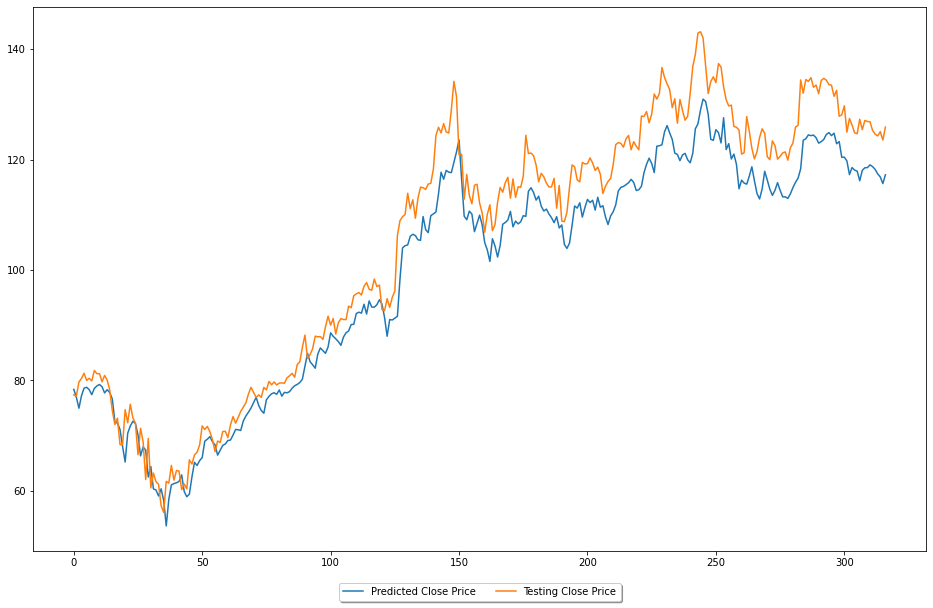

In [56]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()